# Lecture 30 - Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Logistic Discrimination, sometimes called Logistic Regression

*Note that, despite of its name, logistic regression is a model for classification, not regression.*

The **logistic discriminant** is a linear model for binary classification that can be extended to multi-class classification using the one-vs-all approach.

In logistic logistic discrimination, we do not model the class-conditional densities, $p(x|C_i)$, but rather their ratio. Let us assume we are working with a two-class problem and assume that the log likelihood ratio (or **odds ratio**) is linear:

$$\log\frac{P(x|C_1)}{P(x|C_2)} = \mathbf{w}^Tx + b$$

* This is only true, if the classes are Gaussian-distributed!

* But logistic discrimination has a wider scope of applicability; for example, $x$ may be composed of discrete attributes or may be a mixture of continuous and discrete attributes. Using Bayes’ rule, we have:

\begin{align}
\operatorname{logit} P(C_1|x) &=\log \frac{P(C_1|x)}{1-P(C_1|x)}\\
&= \log \frac{P(x|C_1)}{P(x|C_2)} + \log \frac{P(C_1)}{P(C_2)} \\
&= \mathbf{w}^Tx + w_0
\end{align}

where $w_0 = b + \log \frac{P(C_1)}{P(C_2)}$.

Rearranging terms, we get the probabilistic classification:

$$y = P(C_1|x) = \frac{1}{1+\exp\left(-(\mathbf{w}^Tx+w_0)\right)}$$

This is the sigmoid function:

$$\phi(z) = \frac{1}{1+\exp(-z)}$$

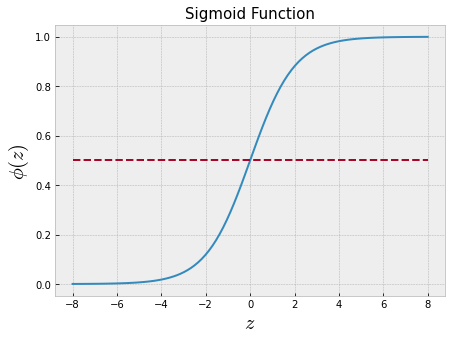

In [2]:
z = np.linspace(-8,8,100)

plt.figure(figsize=(7,5))
plt.plot(z, 1/(1+np.exp(-z)))
plt.plot(z, [0.5]*len(z),'--')
plt.xlabel('$z$',size=20); plt.ylabel('$\phi(z)$',size=20);
plt.title('Sigmoid Function',size=15);

* We can see that $\phi(z)\rightarrow 1$ as $z\rightarrow\infty$, since $\exp(-z)$ becomes very small for large values of $z$.

* Similarly, $\phi(z)\rightarrow 0$ as $z\rightarrow -\infty$ as the result of an increasingly large denominator. 

Thus, we conclude that this sigmoid function takes real number values as input and transforms them to values in the range $[0, 1]$ with an intercept at $\phi(z)=0.5$.

This is the same as using a sigmoid function as the **activation function** in the perceptron diagram.

Thus the output of the sigmoid function is then interpreted as the probability of particular sample belonging to $C_1$, given its features $x$ parameterized by the weights $w$. 

* For example, if we compute $\phi(z)=0.8$ for a particular sample, it means that the chance that this sample is in $C_1$ is 80%. 

The predicted probability can then simply be converted into a binary outcome via a quantizer (unit step function):

\begin{align}
\hat{t} = y &= \begin{cases}1, & \phi(z)\geq 0.5\\ 0, & \text{otherwise}\end{cases}\\
&=\begin{cases}1, & \phi(\mathbf{w}^Tx+w_0)\geq 0.5\\ 0, & \text{otherwise}\end{cases}
\end{align}

or,

\begin{align}
\hat{t} = y &= \begin{cases}1, & z\geq 0\\ 0, & z<0\end{cases} \\
&= \begin{cases}1, & \mathbf{w}^Tx+w_0\geq 0\\ 0, & \mathbf{w}^Tx+w_0<0\end{cases}
\end{align}

## The Objective Function

Let $\{(x_i,t_i)\}_{i=1}^N$ be the set of input samples and its class labels, where $t_i\in\{0,1\}$. Assuming the data samples are i.i.d., we can build the observed data likelihood:

$$\mathcal{L}^0 = \prod_{i=1}^N P(y_i|x_i; \mathbf{w}) = \phi(z_i)^{t_i}(1-\phi(z_i))^{1-t_i}$$

We can apply the "trick" (log-likelihood) to build the data likelihood":

$$\mathcal{L} = \sum_{i=1}^N t_i\log\phi(z_i) +(1-t_i)\log(1-\phi(z_i))$$

where $\phi(z) = \frac{1}{1+\exp(-z)}$ and $z_i = \mathbf{w}^Tx_i+w_0$.

We want to maximize this likelihood to the data, or we can also write it as a minimization optimization:

$$J(\mathbf{w},w_0) = \sum_{i=1}^N - t_i\log\phi(z_i) - (1-t_i)\log(1-\phi(z_i))$$

This objective function is also known as **cross-entropy**.

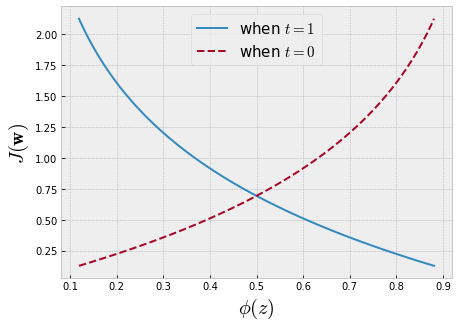

In [3]:
z = np.linspace(-2,2,100)

phi = lambda z: 1/(1+np.exp(-z))

plt.figure(figsize=(7,5))
plt.plot(phi(z), -np.log(phi(z)),label='when $t=1$')
plt.plot(phi(z), -np.log(1-phi(z)),'--',label='when $t=0$')
plt.legend(fontsize=15); plt.xlabel('$\phi(z)$',size=20)
plt.ylabel('$J(\mathbf{w})$',size=20);

We can see that the cost approaches 0 if we correctly predict that a sample belongs to class 1. Similarly, we can see on the y axis that the cost also approaches 0 if we correctly predict class 0. However, if the prediction is wrong, the cost goes towards infinity: we penalize wrong predictions with an increasingly larger cost.

As we do not have the global *picture* of what the objective function, $J(\mathbf{w})$, we apply a search method to navigate through the objective function to find the *local optima* starting from an initial value, namely, **gradient descent**.

$$\mathbf{w}^{(t+1)} \longleftarrow \mathbf{w}^{(t)} - \eta \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}^{(t)}}$$

$$\mathbf{w_0}^{(t+1)} \longleftarrow \mathbf{w_0}^{(t)} - \eta \frac{\partial J(\mathbf{w})}{\partial \mathbf{w_0}^{(t)}}$$

where $\eta$ is the learning rate (or step size).

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}^{(t)}} =
\sum_{i=1}^N -t_i\frac{1}{\phi(z_i)}\frac{\partial\phi(z_i)}{\partial z_i}\frac{\partial z_i}{\partial\mathbf{w}} -(1-t_i)\frac{1}{1-\phi(z_i)}\left(-\frac{\partial\phi(z_i)}{\partial z_i}\frac{\partial z_i}{\partial\mathbf{w}}\right)$$

where $\frac{\partial\phi(z_i)}{\partial z_i} = \phi'(z_i)$ and $\frac{\partial z_i}{\partial\mathbf{w}} = x_i$. Substituting:

\begin{align}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}^{(t)}} &= \sum_{i=1}^N -t_i \frac{\phi'(z_i)}{\phi(z_i)} x_i + (1-t_i)\frac{\phi'(z_i)}{1-\phi(z_i)} x_i \\
&= \sum_{i=1}^N \left(\frac{t_i}{\phi(z_i)} - \frac{1-t_i}{1-\phi(z_i)}\right)\phi'(z_i)x_i
\end{align}

where $\phi'(z_i)= \phi(z_i)(1-\phi(z_i))$, then applying some substitutions we have:

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}^{(t)}} = (t_i - y_i)x_i$$

and, similarly,

$$\frac{\partial J(\mathbf{w})}{\partial w_0^{(t)}} = (t_i - y_i)$$

Finally,

$$\mathbf{w}^{(t+1)} \longleftarrow \mathbf{w}^{(t)} - \eta (t_i - y_i)x_i$$

$$\mathbf{w_0}^{(t+1)} \longleftarrow \mathbf{w_0}^{(t)} - \eta (t_i - y_i)$$

**Initialization:** it is best to initialize $\mathbf{w}$ with random values close to 0; generally they are drawn uniformly from the interval $[−0.01, 0.01]$. 

* The reason for this is that if the initial $\mathbf{w}$ are large in magnitude, the weighted sum may also be large and may saturate the sigmoid. 

* If the initial weights are close to 0, the sum will stay in the middle region where the derivative is nonzero and an update can take place. 

* If the weighted sum is large in magnitude (smaller than −5 or larger than +5), the derivative of the sigmoid will be almost 0 and weights will not be updated. 
    * When we stack up a lot of these perceptrons in layers and add a few layers, this "close to 0" gradient will lead to a phenomenon in neural networks known as the **vanishing gradient**.

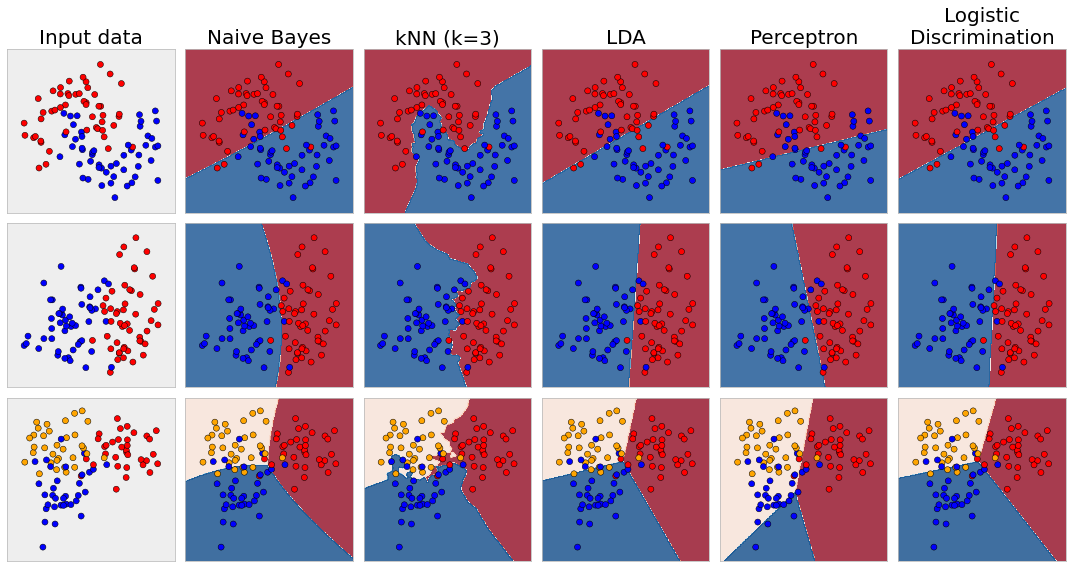

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
plt.style.use('seaborn-colorblind')

h = .02  # step size in the mesh

names = ["Naive Bayes", "kNN (k=3)", "LDA", "Perceptron", "Logistic\nDiscrimination"]

classifiers = [
    GaussianNB(),
    KNeighborsClassifier(3),
    LinearDiscriminantAnalysis(),
    Perceptron(),
    LogisticRegression()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

X2, y2 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, n_classes=3)
rng = np.random.RandomState(2)
X2 += 2 * rng.uniform(size=X2.shape)
linearly_separable2 = (X2, y2)


datasets = [make_moons(noise=0.3, random_state=0),
            linearly_separable,
           linearly_separable2]

figure = plt.figure(figsize=(15, 8))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['red', 'orange','blue'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", fontsize=20)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X, y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize=20)
        i += 1

plt.tight_layout()